### Data Analysis for Open-Ended Pathology VQA

This code will perform the anaylysis for the data collected by the Pathologists

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

Reading the data

In [2]:
vqa_data = pd.read_csv('data/open_ended_vqa_new.csv')
vqa_data = vqa_data.rename(columns={vqa_data.columns[2]: 'Image1_Path',
                                    vqa_data.columns[26]: 'Image2_Path',
                                    vqa_data.columns[27]: 'Image3_Path',
                                    vqa_data.columns[28]: 'Image4_Path',
                                    vqa_data.columns[29]: 'Image5_Path',
                                    'Image 1 Magnification ': 'Image1_Mag',
                                    'Image 2 Magnification ': 'Image2_Mag',
                                    'Image 3 Magnification ': 'Image3_Mag',
                                    'Image 4 Magnification ': 'Image4_Mag',
                                    'Image 5 Magnification ': 'Image5_Mag'})
vqa_data.head()

,Timestamp,Pathologist ID,Image1_Path,Organ,Categorization,Regional Anatomy,Open Ended - Question 1,Open Ended - Answer 1,Open Ended - Answer 2,Open Ended - Question 2,...,Open Ended - Wrong Answer 1,Open Ended - Wrong Answer 2,Image2_Mag,Image3_Mag,Image4_Mag,Image5_Mag,Image2_Path,Image3_Path,Image4_Path,Image5_Path
0,2/25/2025 13:41:20,CK,https://drive.google.com/open?id=1tgv50Q9W4Bm_...,Hematolymphoid - Lymph Nodes,Neoplasia (Malignant),Lymph node,What is the primary architectural pattern obse...,Nodular pattern,Germinal centers are absent,What is a common component of lymph node archi...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2/25/2025 13:46:25,CK,https://drive.google.com/open?id=1igYpj4RL0XKx...,Hematolymphoid - Lymph Nodes,Neoplasia (Malignant),Lymph node,What is the predominant cell type seen here?,The main cell type observed here is a lymphocy...,These would best be characterized as small lym...,What is the best description for the cell size...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2/25/2025 13:51:37,CK,https://drive.google.com/open?id=1DKNZJQJ17SkX...,Hematolymphoid - Lymph Nodes,Neoplasia (Malignant),Lymph node,"In this mantle cell lymphoma, what is the best...",The nuclei of the abnormal lymphocytes are mos...,This should be considered a highly cellular ti...,What is the best description for the density a...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2/26/2025 11:30:23,CK,https://drive.google.com/open?id=1jUe0z6wlZ0s9...,Gastrointestinal - Small Intenstine,Infection (Benign),Intestinal villous mucosa,"In a child with poor weight gain, what are the...",Features that argue against celiac disease in ...,Granulomas here are often the consequence of u...,What does the granuloma in the lamina propria ...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2/26/2025 11:42:26,CK,https://drive.google.com/open?id=1VNr78I5w671g...,Gastrointestinal - Dudenum,Infection (Benign),Intestinal villous mucosa,What are the main histologic features of a non...,Non-necrotizing granulomas are characterized b...,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### Total Cases/Images

In [3]:
print("Total Cases:", len(vqa_data))
print("Total Images 1:", sum(~vqa_data['Image1_Path'].isnull()))
print("Total Images 2:", sum(~vqa_data['Image2_Path'].isnull()))
print("Total Images 3:", sum(~vqa_data['Image3_Path'].isnull()))
print("Total Images 4:", sum(~vqa_data['Image4_Path'].isnull()))
print("Total Images 5:", sum(~vqa_data['Image5_Path'].isnull()))

Total Cases: 157
Total Images 1: 157
Total Images 2: 37
Total Images 3: 37
Total Images 4: 0
Total Images 5: 0


#### Pathologist  Cases Breakdown

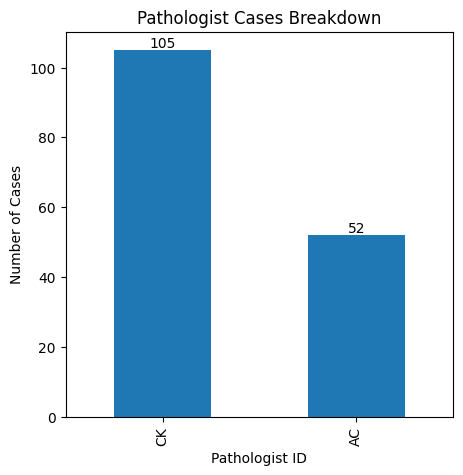

In [4]:
ax = vqa_data['Pathologist ID'].value_counts().plot(kind='bar', figsize=(5, 5), title='Pathologist Cases Breakdown', xlabel='Pathologist ID', ylabel='Number of Cases', label='Pathologist ID')
ax.bar_label(ax.containers[0])
plt.show()

#### Image Magnification Breakdown

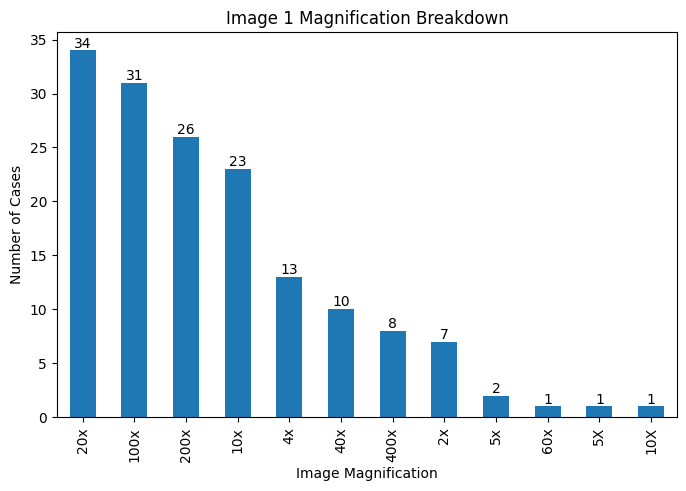

In [5]:
ax=vqa_data['Image1_Mag'].value_counts().plot(kind='bar', figsize=(8, 5), title='Image 1 Magnification Breakdown', xlabel='Image Magnification', ylabel='Number of Cases')
ax.bar_label(ax.containers[0])
plt.show()

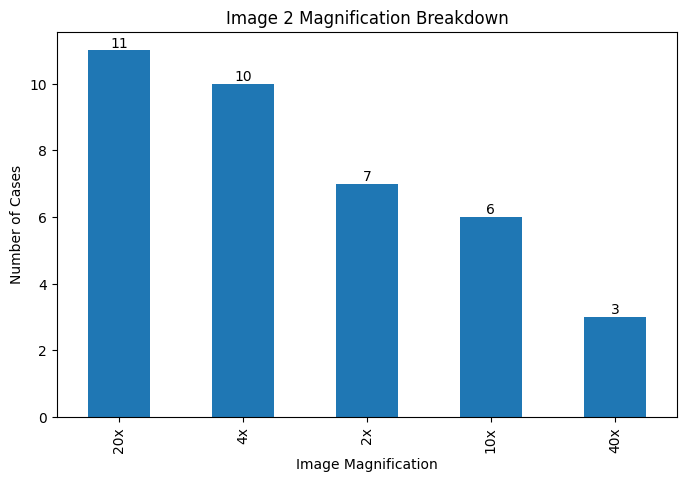

In [6]:
ax=vqa_data['Image2_Mag'].value_counts().plot(kind='bar', figsize=(8, 5), title='Image 2 Magnification Breakdown', xlabel='Image Magnification', ylabel='Number of Cases')
ax.bar_label(ax.containers[0])
plt.show()

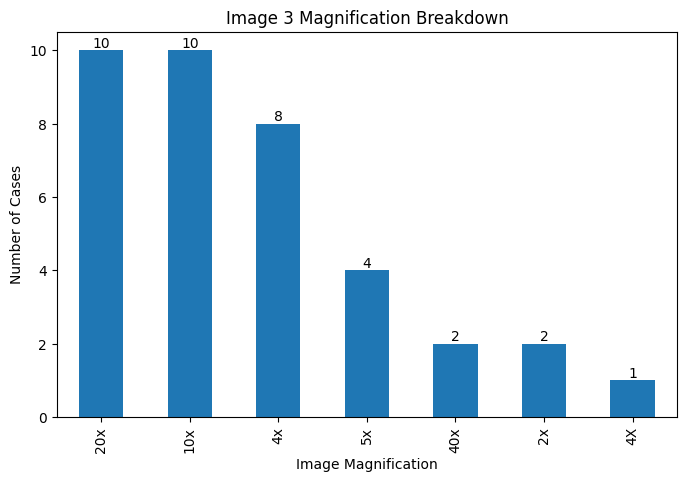

In [7]:
ax=vqa_data['Image3_Mag'].value_counts().plot(kind='bar', figsize=(8, 5), title='Image 3 Magnification Breakdown', xlabel='Image Magnification', ylabel='Number of Cases')
ax.bar_label(ax.containers[0])
plt.show()

#### Organ Breakdown

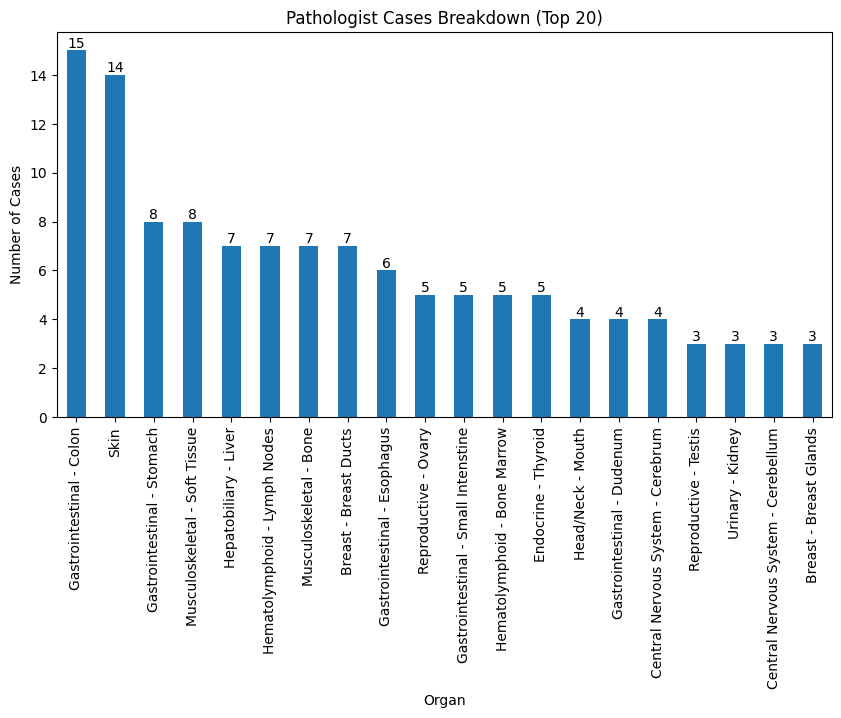

In [8]:
ax = vqa_data['Organ'].value_counts().head(20).plot(kind='bar', figsize=(10, 5), title='Pathologist Cases Breakdown (Top 20)', xlabel='Organ', ylabel='Number of Cases')
ax.bar_label(ax.containers[0])
plt.show()

#### Categorization Breakdown

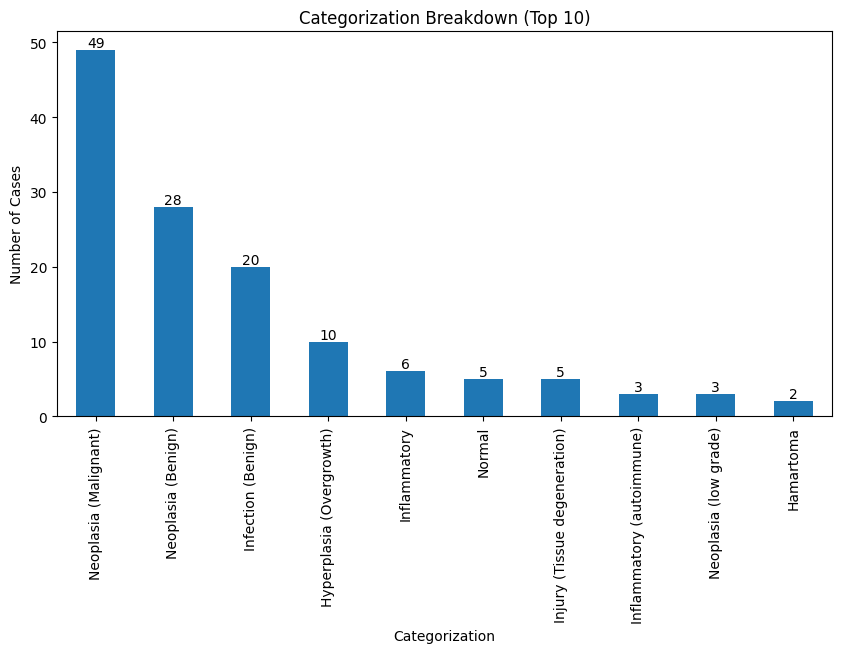

In [9]:
ax = vqa_data['Categorization'].value_counts().head(10).plot(kind='bar', figsize=(10, 5), title='Categorization Breakdown (Top 10)', xlabel='Categorization', ylabel='Number of Cases')
ax.bar_label(ax.containers[0])
plt.show()

#### Regional Anatomy Breakdown

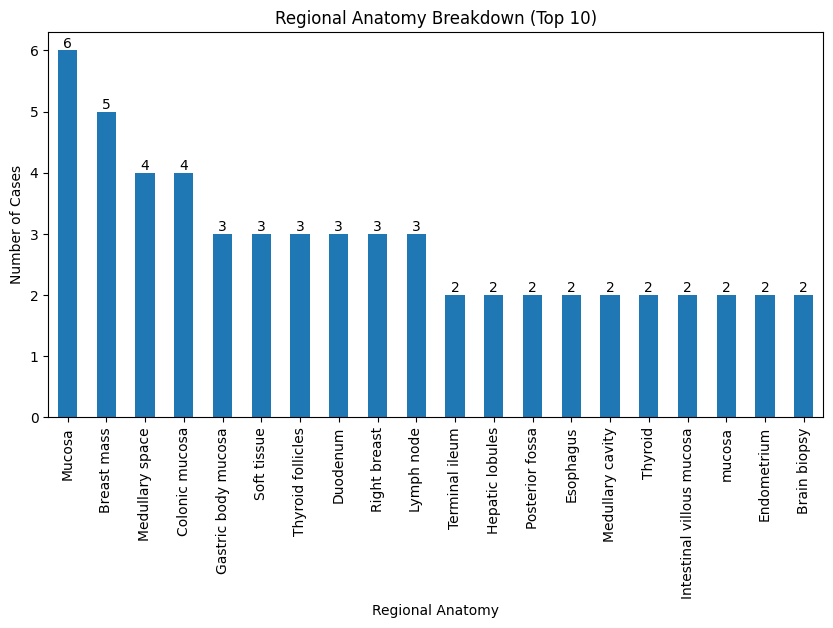

In [10]:
ax = vqa_data['Regional Anatomy'].value_counts().head(20).plot(kind='bar', figsize=(10, 5), title='Regional Anatomy Breakdown (Top 10)', xlabel='Regional Anatomy', ylabel='Number of Cases')
ax.bar_label(ax.containers[0])
plt.show()

#### Open-Ended Questions/Answers

In [11]:
open_ended_1 = vqa_data[(~vqa_data['Open Ended - Question 1'].isnull()) & (~vqa_data['Open Ended - Answer 1'].isnull())]
open_ended_1_with_wrong = vqa_data[(~vqa_data['Open Ended - Question 1'].isnull()) & (~vqa_data['Open Ended - Answer 1'].isnull()) & (~vqa_data['Open Ended - Wrong Answer 1'].isnull())]
open_ended_1_without_wrong = vqa_data[(~vqa_data['Open Ended - Question 1'].isnull()) & (~vqa_data['Open Ended - Answer 1'].isnull()) & (vqa_data['Open Ended - Wrong Answer 1'].isnull())]

open_ended_2 = vqa_data[(~vqa_data['Open Ended - Question 2'].isnull()) & (~vqa_data['Open Ended - Answer 2'].isnull())]
open_ended_2_with_wrong = vqa_data[(~vqa_data['Open Ended - Question 2'].isnull()) & (~vqa_data['Open Ended - Answer 2'].isnull()) & (~vqa_data['Open Ended - Wrong Answer 2'].isnull())]
open_ended_2_without_wrong = vqa_data[(~vqa_data['Open Ended - Question 2'].isnull()) & (~vqa_data['Open Ended - Answer 2'].isnull()) & (vqa_data['Open Ended - Wrong Answer 2'].isnull())]

In [12]:
open_ended = len(open_ended_1) + len(open_ended_2)
open_ended_with_wrong = len(open_ended_1_with_wrong) + len(open_ended_2_with_wrong)
open_ended_without_wrong = len(open_ended_1_without_wrong) + len(open_ended_2_without_wrong)

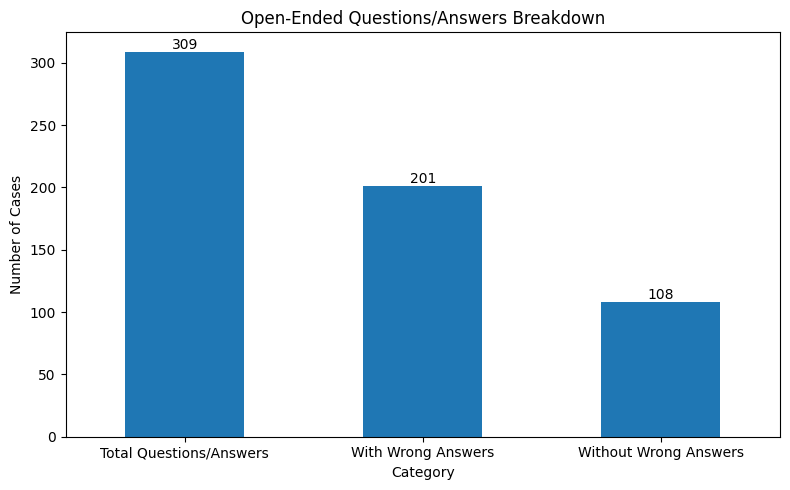

In [13]:
ax = pd.Series({
    'Total Questions/Answers': open_ended,
    'With Wrong Answers': open_ended_with_wrong,
    'Without Wrong Answers': open_ended_without_wrong
}).plot(kind='bar', figsize=(8, 5), title='Open-Ended Questions/Answers Breakdown', xlabel='Category', ylabel='Number of Cases')
ax.bar_label(ax.containers[0])
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

### Multiple Choice Questions/Answers

In [14]:
print("Total MCQ Questions/Answers: ", len(vqa_data[(~vqa_data['MCQ - Question'].isnull()) &
                                        (~vqa_data['MCQ - Option 1'].isnull()) &
                                        (~vqa_data['MCQ - Option 2'].isnull()) &
                                        (~vqa_data['MCQ - Option 3'].isnull()) &
                                        (~vqa_data['MCQ - Option 4'].isnull()) &
                                        (~vqa_data['MCQ - Option 5'].isnull()) &
                                        (~vqa_data['MCQ - Answer'].isnull())]))

Total MCQ Questions/Answers:  157


#### Close-Ended Questions/Answers

In [15]:
print("Total Close-Ended Questions/Answers: ", len(vqa_data[(~vqa_data['Close-Ended Question 1'].isnull()) &
                                                    (~vqa_data['Close-Ended Answer 1'].isnull())]))

Total Close-Ended Questions/Answers:  157
